In [1]:
#Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
#Read CSV file
mouse_file = "Resources/Mouse_metadata.csv"
result_file = "Resources/Study_results.csv"

mouse_data = pd.read_csv(mouse_file)
study_results = pd.read_csv(result_file)


In [3]:
# Combine the data into a single dataset
combined_data = pd.merge(mouse_data,study_results,how="outer", on="Mouse ID")
# Display the data table for preview
print(combined_data.shape)
combined_data.head()

(1893, 8)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
combined_data["Mouse ID"].nunique()

249

In [5]:
 # Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_data.loc[combined_data[['Mouse ID','Timepoint']].duplicated(keep=False),:]
                                                           

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
 # Optional: Get all the data for the duplicate mouse ID. 
print(combined_data.loc[(combined_data["Mouse ID"]=="g989"),:].shape)
combined_data.loc[(combined_data["Mouse ID"]=="g989"),:]

(13, 8)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_data.drop(combined_data.loc[combined_data['Mouse ID']=="g989",:].index,inplace=True)
combined_data.shape

(1880, 8)

In [8]:
# Checking the number of mice in the clean DataFrame.
combined_data['Mouse ID'].nunique()

248

In [9]:
 # Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
regimen_data = combined_data.groupby('Drug Regimen')
regimen_mean = regimen_data['Tumor Volume (mm3)'].mean()
regimen_median = regimen_data['Tumor Volume (mm3)'].median()
regimen_stdev = regimen_data['Tumor Volume (mm3)'].std()
regimen_sem = regimen_data['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({
    "Mean": regimen_mean,
    "Median": regimen_median,
    "Standard Deviation": regimen_stdev,
    "SEM": regimen_sem
})

summary_df

,Mean,Median,Standard Deviation,SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.320930,50.446266,6.622085,0.544332
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


In [10]:
 # Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
regimen_data['Tumor Volume (mm3)'].agg(['mean','median','std','sem'])

,mean,median,std,sem
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.320930,50.446266,6.622085,0.544332
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


<AxesSubplot:xlabel='Drug Regimen'>

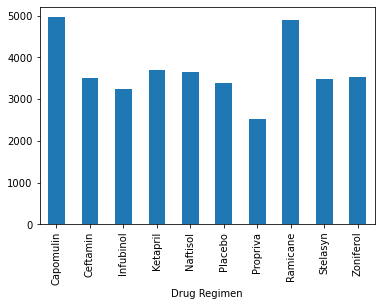

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint_count = regimen_data['Timepoint'].sum()
timepoint_df= pd.DataFrame({'Number of Mice Timepoints': timepoint_count})
timepoint_df.plot(kind="bar",legend=False)

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

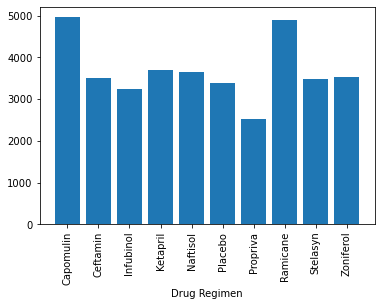

In [13]:
x_axis = timepoint_df.index
plt.bar(x_axis,timepoint_df['Number of Mice Timepoints'])
plt.xticks(rotation='vertical')
plt.xlabel('Drug Regimen')
plt.show()

array([<AxesSubplot:ylabel='Sex'>], dtype=object)

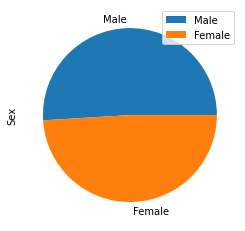

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_df = pd.DataFrame({"Sex":combined_data['Sex'].value_counts()})
sex_df.plot(kind="pie",subplots=True)

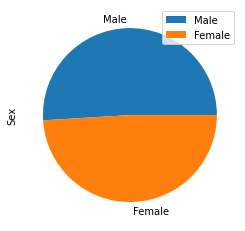

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(sex_df['Sex'],labels=sex_df.index)
plt.legend()
plt.ylabel('Sex')
plt.show()

In [28]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

mice_group = combined_data.groupby('Mouse ID')
max_timepoint_df =pd.DataFrame({'Timepoint': mice_group['Timepoint'].max()}) 
max_timepoint_df

,Timepoint
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30
...,...
z435,10
z578,45
z581,45


In [30]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_vol_df = pd.merge(combined_data,max_timepoint_df,on=["Mouse ID","Timepoint"])
tumor_vol_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

{'whiskers': [<matplotlib.lines.Line2D at 0x1cbb6e45ee0>,
 'caps': [<matplotlib.lines.Line2D at 0x1cbb6e544c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cbb6e45c10>],
 'medians': [<matplotlib.lines.Line2D at 0x1cbb6e54a60>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cbb6e54d30>],
 'means': []}

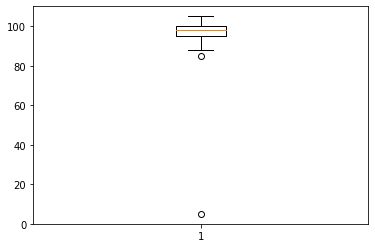

In [60]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.

# Locate the rows which contain mice on each drug and get the tumor volumes

# capomulin_data = tumor_vol_df.loc[(tumor_vol_df['Drug Regimen'] == 'Capomulin') ,['Tumor Volume (mm3)']]
# # ramicane_data = tumor_vol_df.loc[(tumor_vol_df['Drug Regimen'] == 'Ramicane') ,['Tumor Volume (mm3)']]
# # infubinol_data = tumor_vol_df.loc[(tumor_vol_df['Drug Regimen'] == 'Infubinol') ,['Tumor Volume (mm3)']]
# # ceftamin_data = tumor_vol_df.loc[(tumor_vol_df['Drug Regimen'] == 'Infubinol') ,['Tumor Volume (mm3)']]

tumor_vol_data = tumor_vol_df.loc[(tumor_vol_df['Drug Regimen'] == 'Capomulin')|
                 (tumor_vol_df['Drug Regimen'] == 'Ramicane')|
                 (tumor_vol_df['Drug Regimen'] == 'Infubinol')|
                 (tumor_vol_df['Drug Regimen'] == 'Ceftamin'),['Tumor Volume (mm3)']]

tumor_volumes=tumor_vol_data['Tumor Volume (mm3)']

fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_volumes)